# PS Parallel Programming / Sheet 12
# Fabio Valentini / MN 01018782

## Exercise 1

- implementation (sequential and parallel): `./nbody/nbody.c`
- OpenMP features are toggled by presence of `-fopenmp` compiler flag

### Implementation Details

The chosen algorithm has complexity $\mathcal{O}(n^2 \cdot t)$ (where n is the number of points, and t the number of time steps). This is confirmed by the observed wall times.

- All functions for common vector operations are written so they can be inlined.
- Compilation with `-O3 -ffast-math` makes it possible to use `sqrts{s,d}` CPU instructions directly instead of calling the `sqrt` function from the standard library, and strict standards compliance for the result of the `sqrt` function is not required in this application.

With those two optimizations, the `update_points` function contains no function calls at all (confirmed on <https://godbolt.org>).

Additionally, the innermost loop was split into loops for $0 \le j \lt i$ and $i \lt j \lt n$ to avoid the conditional for $i \neq j$ in the loop.

In [1]:
# initial setup

import subprocess
import timeit

from IPython.display import HTML, set_matplotlib_formats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
set_matplotlib_formats('svg')

SAMPLE_SIZE = 3

### Performance Measurements (Local)

In [2]:
PROBLEM_SIZES = [100, 200, 500, 1000, 1500, 2000, 3500, 5000, 7500, 10000]

ITERATIONS = 100
sequentials_size_100 = []

for ps in PROBLEM_SIZES:
    def runit():
        ret = subprocess.run(
            ["./nbody/nbody", str(ps), str(ITERATIONS), "0"],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
        )
        ret.check_returncode()
    sequentials_size_100.append(timeit.timeit(runit, number=SAMPLE_SIZE) / SAMPLE_SIZE)

ITERATIONS = 200
sequentials_size_200 = []

for ps in PROBLEM_SIZES:
    def runit():
        ret = subprocess.run(
            ["./nbody/nbody", str(ps), str(ITERATIONS), "0"],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
        )
        ret.check_returncode()
    sequentials_size_200.append(timeit.timeit(runit, number=SAMPLE_SIZE) / SAMPLE_SIZE)

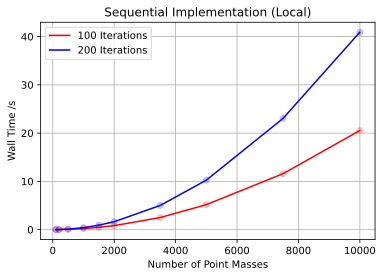

In [3]:
plt.plot(PROBLEM_SIZES, sequentials_size_100, "ro", alpha=0.2)
plt.plot(PROBLEM_SIZES, sequentials_size_100, "r-", label="100 Iterations")

plt.plot(PROBLEM_SIZES, sequentials_size_200, "bo", alpha=0.2)
plt.plot(PROBLEM_SIZES, sequentials_size_200, "b-", label="200 Iterations")

plt.title("Sequential Implementation (Local)")
plt.xlabel("Number of Point Masses")
plt.ylabel("Wall Time /s")

plt.legend()
plt.grid()
plt.show()

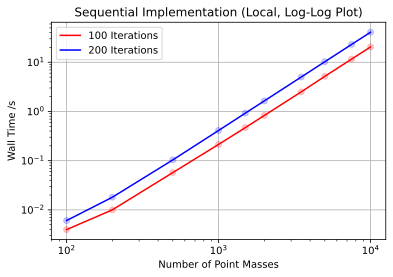

In [4]:
plt.plot(PROBLEM_SIZES, sequentials_size_100, "ro", alpha=0.2)
plt.plot(PROBLEM_SIZES, sequentials_size_100, "r-", label="100 Iterations")

plt.plot(PROBLEM_SIZES, sequentials_size_200, "bo", alpha=0.2)
plt.plot(PROBLEM_SIZES, sequentials_size_200, "b-", label="200 Iterations")

plt.title("Sequential Implementation (Local, Log-Log Plot)")
plt.xlabel("Number of Point Masses")
plt.ylabel("Wall Time /s")

plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.grid()
plt.show()

In [5]:
sequential_size_relative = np.array(sequentials_size_200) / np.array(sequentials_size_100)
sequential_size_square_deviation = 1 - sequential_size_relative / 2

sequential_size_data = np.array([
    PROBLEM_SIZES,
    sequentials_size_100,
    sequentials_size_200,
    sequential_size_relative,
    sequential_size_square_deviation,
]).T
sequential_size_df = pd.DataFrame(
    sequential_size_data,
    columns=[
        "Number of Point Masses",
        "Wall Time (100 Iterations) /s",
        "Wall Time (200 Iterations) /s",
        "Wall Time Ratio (200 / 100)",
        "Relative Deviation from O(n)",
    ]
)
HTML(sequential_size_df.to_html(index=False))

Number of Point Masses,Wall Time (100 Iterations) /s,Wall Time (200 Iterations) /s,Wall Time Ratio (200 / 100),Relative Deviation from O(n)
100.0,0.003970,0.006070,1.528750,0.235625
200.0,0.010016,0.018062,1.803300,0.098350
500.0,0.057276,0.103754,1.811478,0.094261
1000.0,0.214091,0.411058,1.920015,0.039993
1500.0,0.469857,0.924735,1.968120,0.015940
2000.0,0.830755,1.641995,1.976510,0.011745
3500.0,2.506198,5.021720,2.003720,-0.001860
5000.0,5.179795,10.252194,1.979266,0.010367
7500.0,11.599032,23.052740,1.987471,0.006264
10000.0,20.537522,40.916336,1.992272,0.003864


The Wall Time measurements confirm that the runtime scales almost exactly linearly with the number of iterations $t$.

In [6]:
ITERATIONSS = [100, 200, 500, 1000, 1500, 2000, 3500, 5000, 7500, 10000]

PROBLEM_SIZE = 500
sequentials_iter_500 = []

for its in ITERATIONSS:
    def runit():
        ret = subprocess.run(
            ["./nbody/nbody", str(PROBLEM_SIZE), str(its), "0"],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
        )
        ret.check_returncode()
    sequentials_iter_500.append(timeit.timeit(runit, number=SAMPLE_SIZE) / SAMPLE_SIZE)

PROBLEM_SIZE = 1000
sequentials_iter_1000 = []

for its in ITERATIONSS:
    def runit():
        ret = subprocess.run(
            ["./nbody/nbody", str(PROBLEM_SIZE), str(its), "0"],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
        )
        ret.check_returncode()
    sequentials_iter_1000.append(timeit.timeit(runit, number=SAMPLE_SIZE) / SAMPLE_SIZE)

PROBLEM_SIZE = 2000
sequentials_iter_2000 = []

for its in ITERATIONSS:
    def runit():
        ret = subprocess.run(
            ["./nbody/nbody", str(PROBLEM_SIZE), str(its), "0"],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
        )
        ret.check_returncode()
    sequentials_iter_2000.append(timeit.timeit(runit, number=SAMPLE_SIZE) / SAMPLE_SIZE)

In [7]:
sequentials_1000_1000 = np.array([sequentials_iter_1000[3]])
sequentials_2000_1000 = np.array([sequentials_iter_2000[3]])

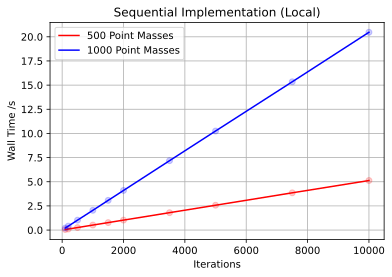

In [8]:
plt.plot(ITERATIONSS, sequentials_iter_500, "ro", alpha=0.2)
plt.plot(ITERATIONSS, sequentials_iter_500, "r-", label="500 Point Masses")

plt.plot(ITERATIONSS, sequentials_iter_1000, "bo", alpha=0.2)
plt.plot(ITERATIONSS, sequentials_iter_1000, "b-", label="1000 Point Masses")

plt.title("Sequential Implementation (Local)")
plt.xlabel("Iterations")
plt.ylabel("Wall Time /s")

plt.legend()
plt.grid()
plt.show()

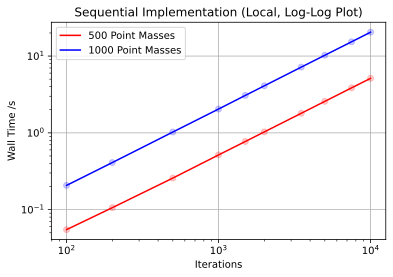

In [9]:
plt.plot(ITERATIONSS, sequentials_iter_500, "ro", alpha=0.2)
plt.plot(ITERATIONSS, sequentials_iter_500, "r-", label="500 Point Masses")

plt.plot(ITERATIONSS, sequentials_iter_1000, "bo", alpha=0.2)
plt.plot(ITERATIONSS, sequentials_iter_1000, "b-", label="1000 Point Masses")

plt.title("Sequential Implementation (Local, Log-Log Plot)")
plt.xlabel("Iterations")
plt.ylabel("Wall Time /s")

plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.grid()
plt.show()

In [10]:
sequential_iter_relative = np.array(sequentials_iter_1000) / np.array(sequentials_iter_500)
sequential_iter_square_deviation = 1 - sequential_iter_relative / 4

sequential_iter_data = np.array([
    ITERATIONSS,
    sequentials_iter_500,
    sequentials_iter_1000,
    sequential_iter_relative,
    sequential_iter_square_deviation,
]).T
sequential_iter_df = pd.DataFrame(
    sequential_iter_data,
    columns=[
        "Iterations",
        "Wall Time (500 Point masses) /s",
        "Wall Time (1000 Point Masses) /s",
        "Wall Time Ratio (1000 / 500)",
        "Relative Deviation from O(n²)",
    ]
)
HTML(sequential_iter_df.to_html(index=False))

Iterations,Wall Time (500 Point masses) /s,Wall Time (1000 Point Masses) /s,Wall Time Ratio (1000 / 500),Relative Deviation from O(n²)
100.0,0.054930,0.206915,3.766852,0.058287
200.0,0.106094,0.410408,3.868358,0.032910
500.0,0.257623,1.024889,3.978252,0.005437
1000.0,0.516042,2.042958,3.958897,0.010276
1500.0,0.771847,3.074214,3.982930,0.004267
2000.0,1.029197,4.099036,3.982753,0.004312
3500.0,1.799470,7.180002,3.990064,0.002484
5000.0,2.570306,10.250406,3.988010,0.002998
7500.0,3.854588,15.345203,3.981023,0.004744
10000.0,5.127039,20.468155,3.992198,0.001950


The Wall Time measurements confirm that the runtime scales almost exactly quadratically with the number of Point Masses $n$.

In [11]:
THREADS = [*range(1, 16+1)]

ITERATIONS = 1000

PROBLEM_SIZE = 1000
parallels_size_1000 = []

for ps in THREADS:
    def runit():
        ret = subprocess.run(
            ["./nbody/pnbody", str(PROBLEM_SIZE), str(ITERATIONS), "0"],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            env={"OMP_NUM_THREADS": str(ps)},
        )
        ret.check_returncode()
    parallels_size_1000.append(timeit.timeit(runit, number=SAMPLE_SIZE) / SAMPLE_SIZE)

PROBLEM_SIZE = 2000
parallels_size_2000 = []

for ps in THREADS:
    def runit():
        ret = subprocess.run(
            ["./nbody/pnbody", str(PROBLEM_SIZE), str(ITERATIONS), "0"],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            env={"OMP_NUM_THREADS": str(ps)},
        )
        ret.check_returncode()
    parallels_size_2000.append(timeit.timeit(runit, number=SAMPLE_SIZE) / SAMPLE_SIZE)

In [12]:
speedups_1000 = sequentials_1000_1000 / parallels_size_1000
speedups_2000 = sequentials_2000_1000 / parallels_size_2000

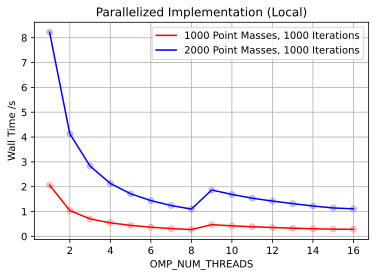

In [13]:
plt.plot(THREADS, parallels_size_1000, "ro", alpha=0.2)
plt.plot(THREADS, parallels_size_1000, "r-", label="1000 Point Masses, 1000 Iterations")

plt.plot(THREADS, parallels_size_2000, "bo", alpha=0.2)
plt.plot(THREADS, parallels_size_2000, "b-", label="2000 Point Masses, 1000 Iterations")

plt.title("Parallelized Implementation (Local)")
plt.xlabel("OMP_NUM_THREADS")
plt.ylabel("Wall Time /s")

plt.legend()
plt.grid()
plt.show()

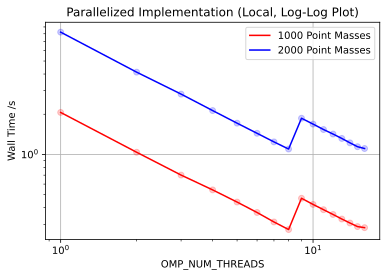

In [14]:
plt.plot(THREADS, parallels_size_1000, "ro", alpha=0.2)
plt.plot(THREADS, parallels_size_1000, "r-", label="1000 Point Masses")

plt.plot(THREADS, parallels_size_2000, "bo", alpha=0.2)
plt.plot(THREADS, parallels_size_2000, "b-", label="2000 Point Masses")

plt.title("Parallelized Implementation (Local, Log-Log Plot)")
plt.xlabel("OMP_NUM_THREADS")
plt.ylabel("Wall Time /s")

plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.grid()
plt.show()

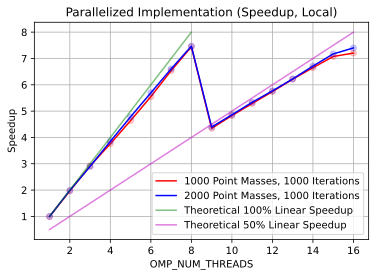

In [15]:
plt.plot(THREADS, speedups_1000, "ro", alpha=0.2)
plt.plot(THREADS, speedups_1000, "r-", label="1000 Point Masses, 1000 Iterations")

plt.plot(THREADS, speedups_2000, "bo", alpha=0.2)
plt.plot(THREADS, speedups_2000, "b-", label="2000 Point Masses, 1000 Iterations")

threads8 = np.array(THREADS[0:8])
plt.plot(threads8, threads8, "g-", alpha=0.5, label="Theoretical 100% Linear Speedup")

threads16 = np.array(THREADS)
plt.plot(threads16, threads16 / 2, "m-", alpha=0.5, label="Theoretical 50% Linear Speedup")

plt.title("Parallelized Implementation (Speedup, Local)")
plt.xlabel("OMP_NUM_THREADS")
plt.ylabel("Speedup")

plt.legend()
plt.grid()
plt.show()

The parallelized implementation scales almost perfectly up to 8 available threads, but for more threads, the speedup drops to almost exactly 50% of the achievable linear speedup. Since the local system has uniform memory access, I assume that this must be caused by some floating-point circuits being available only once per physical core.

In [16]:
parallels_data = np.array([
    THREADS, 
    parallels_size_1000,
    speedups_1000,
    parallels_size_2000,
    speedups_2000
]).T
parallels_df = pd.DataFrame(
    parallels_data,
    columns=[
        "OMP_NUM_THREADS",
        "Wall Time (1000 Points) /s",
        "Speedup (1000 Points)",
        "Wall Time (2000 Points) /s",
        "Speedup (2000 Points)",
    ]
)
HTML(parallels_df.to_html(index=False))

OMP_NUM_THREADS,Wall Time (1000 Points) /s,Speedup (1000 Points),Wall Time (2000 Points) /s,Speedup (2000 Points)
1.0,2.062971,0.990299,8.225947,0.997109
2.0,1.038870,1.966520,4.129338,1.986316
3.0,0.701143,2.913755,2.828858,2.899463
4.0,0.543331,3.760064,2.130883,3.849188
5.0,0.440482,4.638002,1.714695,4.783457
6.0,0.368134,5.549501,1.440314,5.694708
7.0,0.312607,6.535225,1.242129,6.603315
8.0,0.274453,7.443759,1.098314,7.467962
9.0,0.470190,4.344961,1.866367,4.394726
10.0,0.422968,4.830052,1.687523,4.860478


### Performance Measurements (LCC2)

- `./sheet_12.job.sh`
- `./sheet_12.dat`

Code was compiled on LCC2 with GCC 10.3.0.

In [17]:
sequentials_lcc2 = np.array([24.72, 24.71, 24.71])
sequential_lcc2_fastest = sequentials_lcc2.min()

In [18]:
threads_lcc2 = [1, 2, 4, 8]
parallels_lcc2 = np.array([
    np.mean([24.58, 24.58, 24.58]),
    np.mean([12.32, 12.32, 12.32]),
    np.mean([ 6.18,  6.20,  6.18]),
    np.mean([ 3.15,  3.15,  3.15]),
])

speedups_lcc2 = sequential_lcc2_fastest / parallels_lcc2

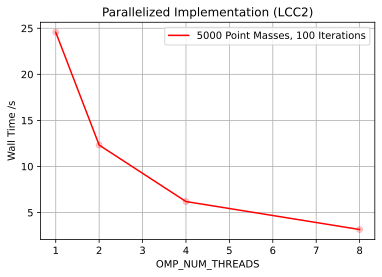

In [19]:
plt.plot(threads_lcc2, parallels_lcc2, "ro", alpha=0.2)
plt.plot(threads_lcc2, parallels_lcc2, "r-", label="5000 Point Masses, 100 Iterations")

plt.title("Parallelized Implementation (LCC2)")
plt.xlabel("OMP_NUM_THREADS")
plt.ylabel("Wall Time /s")

plt.legend()
plt.grid()
plt.show()

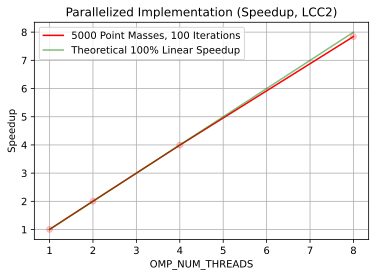

In [20]:
plt.plot(threads_lcc2, speedups_lcc2, "ro", alpha=0.2)
plt.plot(threads_lcc2, speedups_lcc2, "r-", label="5000 Point Masses, 100 Iterations")

threads8 = np.array(THREADS[0:8])
plt.plot(threads8, threads8, "g-", alpha=0.5, label="Theoretical 100% Linear Speedup")

plt.title("Parallelized Implementation (Speedup, LCC2)")
plt.xlabel("OMP_NUM_THREADS")
plt.ylabel("Speedup")

plt.legend()
plt.grid()
plt.show()

In [22]:
parallels_lcc2_data = np.array([threads_lcc2, parallels_lcc2, speedups_lcc2, speedups_lcc2/threads_lcc2]).T
parallels_lcc2_df = pd.DataFrame(
    parallels_lcc2_data,
    columns=[
        "OMP_NUM_THREADS",
        "Wall time (5000 Points, 100 Iterations) /s",
        "Speedup (5000 Points, 100 Iterations)",
        "Fraction of achievable Linear Speedup",
    ]
)
HTML(parallels_lcc2_df.to_html(index=False))

OMP_NUM_THREADS,"Wall time (5000 Points, 100 Iterations) /s","Speedup (5000 Points, 100 Iterations)",Fraction of achievable Linear Speedup
1.0,24.580000,1.005289,1.005289
2.0,12.320000,2.005682,1.002841
4.0,6.186667,3.994073,0.998518
8.0,3.150000,7.844444,0.980556


On LCC2, the parallelized implementation scales almost perfectly with the number of available threads, even though wall clock time of the *entire* program (including setup, data generation, and cleanup) is considered.

## Hardware + Software

- CPU: AMD Ryzen 7 5800X (8 Cores, 16 Threads)
- RAM: 4 x 8GB Gskill TridentZ 3200 MHz (CL14-14-14-34)
- OS: Fedora Workstation 34
- Compiler: `gcc (GCC) 11.1.1 20210531 (Red Hat 11.1.1-3`
- Report: Python 3.9.5, Jupyter Notebook 6.1.6, IPython 7.20.0, numpy 1.20.1, matplotlib 3.4.2, pandas 1.2.1